# Introduction

Look at the hla allele codes of the data using [histo.fyi](https://api.histo.fyi/v1/structures/7s7f) lookup.

In [1]:
DATA_DIR = '/project/koohylab/bmcmaste/projects/tcr-pmhc-interface-analysis/data/processed/apo-holo-mhc-class-I_refined_aligned/'

In [2]:
import os
import glob
import pandas as pd
import requests

In [3]:
structures = pd.DataFrame()

structures['path'] = glob.glob(os.path.join(DATA_DIR, '**', '*.pdb'), recursive=True)
file_names = structures['path'].map(lambda path: path.split('/')[-1].split('.')[0])
structures[['pdb_id', 'chains', 'state']] = file_names.str.split('_').apply(pd.Series)

In [4]:
holo_structures = structures.query("state == 'holo'").copy()
holo_structures = holo_structures.drop('state', axis=1)

In [5]:
def get_allele_slug(pdb_id):
    request = requests.get(f'https://api.histo.fyi/v1/structures/{pdb_id}')
    mhc_data = request.json()

    return mhc_data['structure']['allele']['alpha']['slug']

In [6]:
holo_structures['allele_slug'] = holo_structures['pdb_id'].map(get_allele_slug)

<Axes: ylabel='count'>

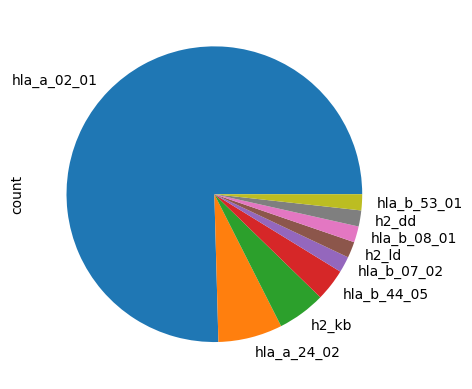

In [7]:
holo_structures['allele_slug'].value_counts().plot(kind='pie')